In [58]:
from pickle import load
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef, brier_score_loss
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
import json

In [60]:
bries = {}
probs = {}
outliers = {}
final = pd.DataFrame()
dataset = 'SMILEsmilesD_features/'
holdouts = random.sample(range(1, 101), 10)

### Treinamento com GAMMA='AUTO'

  0%|          | 0/100 [00:00<?, ?it/s]

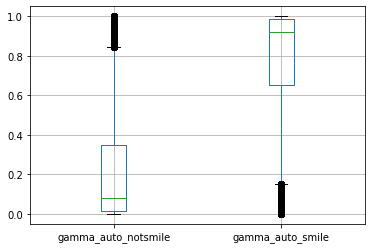

In [62]:
gamma = 'gamma_auto'
# for i in tqdm(holdouts): #uncomment this line and comment the next one to train only on 10 of the holdouts
for i in tqdm(range(1,101)):
    X_train, y_train = load(open(f'SMILEsmilesD_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_features/train_labels_HOGShape_{i}.pkl', 'rb'))
    X_test, y_test = load(open(f'SMILEsmilesD_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_features/test_labels_HOGShape_{i}.pkl', 'rb'))
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='rbf', C=1, probability=True))
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)
    brier = brier_score_loss(y_test, y_prob[:, 1:2], pos_label='smile')
    mask = np.where(y_test == 'smile', True, False)
    y_prob = y_prob[mask]
    # briernotsmile = brier_score_loss(y_test, y_prob[:, :1], pos_label='notsmile')
    if gamma not in bries.keys():
        bries[gamma] = []
        probs[gamma] = []
        outliers[gamma] = {'notsmile': [], 'smile': []}
    bries[gamma].append(brier)
    probs[gamma].append(y_prob[:, :1])
    probanot = pd.DataFrame(y_prob[:, :1], columns=[gamma + '_notsmile']).fillna(value=0)
    proba = pd.DataFrame(y_prob[:, 1:2], columns=[gamma + '_smile']).fillna(value=0)

    #pegando outliers de sem sorriso
    q1 = np.quantile(y_prob[:, :1], 0.25)
    q3 = np.quantile(y_prob[:, :1], 0.75)
    med = np.median(y_prob[:, :1])
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers_notsmile = y_prob[:, :1][(y_prob[:, :1] <= lower_bound) | (y_prob[:, :1] >= upper_bound)]

    #pegando outlier sorriso
    q1 = np.quantile(y_prob[:, 1:2], 0.25)
    q3 = np.quantile(y_prob[:, 1:2], 0.75)
    med = np.median(y_prob[:, 1:2])
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers_smile = y_prob[:, 1:2][(y_prob[:, 1:2] <= lower_bound) | (y_prob[:, 1:2] >= upper_bound)]

    outliers[gamma]['notsmile'].extend(outliers_notsmile)
    outliers[gamma]['smile'].extend(outliers_smile)

    proba = proba.append(probanot)
    final = final.append(probanot)
    final = final.append(proba)
    # proba = proba.fillna(0)
plot = final.boxplot()

In [50]:
df = pd.read_csv('SMILEsmilesD_features/sigmas_frac0.5.csv')

### Treinamento sigest Median

  0%|          | 0/100 [00:00<?, ?it/s]

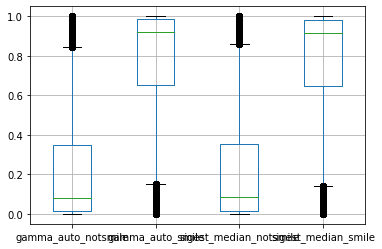

In [63]:
gamma = 'sigest_median'

# for i in tqdm(holdouts): #uncomment this line and comment the next one to train only on 10 of the holdouts
for i in tqdm(range(1,101)):
    X_train, y_train = load(open(f'SMILEsmilesD_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_features/train_labels_HOGShape_{i}.pkl', 'rb'))
    X_test, y_test = load(open(f'SMILEsmilesD_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_features/test_labels_HOGShape_{i}.pkl', 'rb'))
    clf = make_pipeline(StandardScaler(), SVC(gamma=df['median'][i-1], kernel='rbf', C=1, probability=True))
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)
    brier = brier_score_loss(y_test, y_prob[:, 1:2], pos_label='smile')
    mask = np.where(y_test == 'smile', True, False)
    y_prob = y_prob[mask]
    # briernotsmile = brier_score_loss(y_test, y_prob[:, :1], pos_label='notsmile')
    if gamma not in bries.keys():
        bries[gamma] = []
        probs[gamma] = []
        outliers[gamma] = {'notsmile': [], 'smile': []}
    bries[gamma].append(brier)
    probs[gamma].append(y_prob[:, :1])
    probanot = pd.DataFrame(y_prob[:, :1], columns=[gamma + '_notsmile']).fillna(value=0)
    proba = pd.DataFrame(y_prob[:, 1:2], columns=[gamma + '_smile']).fillna(value=0)

    #pegando outliers de sem sorriso
    q1 = np.quantile(y_prob[:, :1], 0.25)
    q3 = np.quantile(y_prob[:, :1], 0.75)
    med = np.median(y_prob[:, :1])
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers_notsmile = y_prob[:, :1][(y_prob[:, :1] <= lower_bound) | (y_prob[:, :1] >= upper_bound)]

    #pegando outlier sorriso
    q1 = np.quantile(y_prob[:, 1:2], 0.25)
    q3 = np.quantile(y_prob[:, 1:2], 0.75)
    med = np.median(y_prob[:, 1:2])
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers_smile = y_prob[:, 1:2][(y_prob[:, 1:2] <= lower_bound) | (y_prob[:, 1:2] >= upper_bound)]

    outliers[gamma]['notsmile'].extend(outliers_notsmile)
    outliers[gamma]['smile'].extend(outliers_smile)

    proba = proba.append(probanot)
    final = final.append(probanot)
    final = final.append(proba)
    # proba = proba.fillna(0)
plot = final.boxplot()

### Treinamento sigest 0.9 quantile

  0%|          | 0/100 [00:00<?, ?it/s]

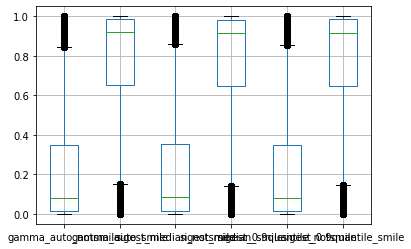

In [64]:
gamma = 'sigest_0.9quantile'

# for i in tqdm(holdouts): #uncomment this line and comment the next one to train only on 10 of the holdouts
for i in tqdm(range(1,101)):
    X_train, y_train = load(open(f'SMILEsmilesD_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_features/train_labels_HOGShape_{i}.pkl', 'rb'))
    X_test, y_test = load(open(f'SMILEsmilesD_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_features/test_labels_HOGShape_{i}.pkl', 'rb'))
    clf = make_pipeline(StandardScaler(), SVC(gamma=df['09quantile'][i-1], kernel='rbf', C=1, probability=True))
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)
    brier = brier_score_loss(y_test, y_prob[:, 1:2], pos_label='smile')
    mask = np.where(y_test == 'smile', True, False)
    y_prob = y_prob[mask]
    # briernotsmile = brier_score_loss(y_test, y_prob[:, :1], pos_label='notsmile')
    if gamma not in bries.keys():
        bries[gamma] = []
        probs[gamma] = []
        outliers[gamma] = {'notsmile': [], 'smile': []}
    bries[gamma].append(brier)
    probs[gamma].append(y_prob[:, :1])
    probanot = pd.DataFrame(y_prob[:, :1], columns=[gamma + '_notsmile']).fillna(value=0)
    proba = pd.DataFrame(y_prob[:, 1:2], columns=[gamma + '_smile']).fillna(value=0)

    #pegando outliers de sem sorriso
    q1 = np.quantile(y_prob[:, :1], 0.25)
    q3 = np.quantile(y_prob[:, :1], 0.75)
    med = np.median(y_prob[:, :1])
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers_notsmile = y_prob[:, :1][(y_prob[:, :1] <= lower_bound) | (y_prob[:, :1] >= upper_bound)]

    #pegando outlier sorriso
    q1 = np.quantile(y_prob[:, 1:2], 0.25)
    q3 = np.quantile(y_prob[:, 1:2], 0.75)
    med = np.median(y_prob[:, 1:2])
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers_smile = y_prob[:, 1:2][(y_prob[:, 1:2] <= lower_bound) | (y_prob[:, 1:2] >= upper_bound)]

    outliers[gamma]['notsmile'].extend(outliers_notsmile)
    outliers[gamma]['smile'].extend(outliers_smile)

    proba = proba.append(probanot)
    final = final.append(probanot)
    final = final.append(proba)
    # proba = proba.fillna(0)
plot = final.boxplot()

### Treinamento sigest media dos quantis

  0%|          | 0/100 [00:00<?, ?it/s]

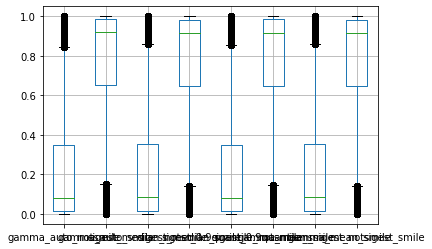

In [65]:
gamma = 'gamma_mean_sigest'

# for i in tqdm(holdouts): #uncomment this line and comment the next one to train only on 10 of the holdouts
for i in tqdm(range(1,101)):

    X_train, y_train = load(open(f'SMILEsmilesD_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_features/train_labels_HOGShape_{i}.pkl', 'rb'))
    X_test, y_test = load(open(f'SMILEsmilesD_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_features/test_labels_HOGShape_{i}.pkl', 'rb'))
    gamma_mean_sigest = (df['09quantile'][i-1] + df['01quantile'][i-1]) / 2.
    clf = make_pipeline(StandardScaler(), SVC(gamma=gamma_mean_sigest, kernel='rbf', C=1, probability=True))
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)
    brier = brier_score_loss(y_test, y_prob[:, 1:2], pos_label='smile')
    mask = np.where(y_test == 'smile', True, False)
    y_prob = y_prob[mask]
    # briernotsmile = brier_score_loss(y_test, y_prob[:, :1], pos_label='notsmile')
    if gamma not in bries.keys():
        bries[gamma] = []
        probs[gamma] = []
        outliers[gamma] = {'notsmile': [], 'smile': []}
    bries[gamma].append(brier)
    probs[gamma].append(y_prob[:, :1])
    probanot = pd.DataFrame(y_prob[:, :1], columns=[gamma + '_notsmile']).fillna(value=0)
    proba = pd.DataFrame(y_prob[:, 1:2], columns=[gamma + '_smile']).fillna(value=0)

    #pegando outliers de sem sorriso
    q1 = np.quantile(y_prob[:, :1], 0.25)
    q3 = np.quantile(y_prob[:, :1], 0.75)
    med = np.median(y_prob[:, :1])
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers_notsmile = y_prob[:, :1][(y_prob[:, :1] <= lower_bound) | (y_prob[:, :1] >= upper_bound)]

    #pegando outlier sorriso
    q1 = np.quantile(y_prob[:, 1:2], 0.25)
    q3 = np.quantile(y_prob[:, 1:2], 0.75)
    med = np.median(y_prob[:, 1:2])
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers_smile = y_prob[:, 1:2][(y_prob[:, 1:2] <= lower_bound) | (y_prob[:, 1:2] >= upper_bound)]

    outliers[gamma]['notsmile'].extend(outliers_notsmile)
    outliers[gamma]['smile'].extend(outliers_smile)

    proba = proba.append(probanot)
    final = final.append(probanot)
    final = final.append(proba)
    # proba = proba.fillna(0)
plot = final.boxplot()

### Treinamento gamma = 1/N

In [55]:
if False:
    gamma = 'gamma_N'
    # for i in tqdm(holdouts): #uncomment this line and comment the next one to train only on 10 of the holdouts
    for i in tqdm(range(1,101)):
        X_train, y_train = load(open(f'SMILEsmilesD_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                            load(open(f'SMILEsmilesD_features/train_labels_HOGShape_{i}.pkl', 'rb'))
        X_test, y_test = load(open(f'SMILEsmilesD_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                            load(open(f'SMILEsmilesD_features/test_labels_HOGShape_{i}.pkl', 'rb'))
        gamma_N = 1./(X_train.shape[0])
        clf = make_pipeline(StandardScaler(), SVC(gamma=gamma_N, kernel='rbf', C=1, probability=True))
        clf.fit(X_train, y_train)
        y_prob = clf.predict_proba(X_test)
        brier = brier_score_loss(y_test, y_prob[:, 1:2], pos_label='smile')
        mask = np.where(y_test == 'smile', True, False)
        y_prob = y_prob[mask]
        # briernotsmile = brier_score_loss(y_test, y_prob[:, :1], pos_label='notsmile')
        if gamma not in bries.keys():
            bries[gamma] = []
            probs[gamma] = []
            outliers[gamma] = {'notsmile': [], 'smile': []}
        bries[gamma].append(brier)
        probs[gamma].append(y_prob[:, :1])
        probanot = pd.DataFrame(y_prob[:, :1], columns=[gamma + '_notsmile']).fillna(value=0)
        proba = pd.DataFrame(y_prob[:, 1:2], columns=[gamma + '_smile']).fillna(value=0)

        #pegando outliers de sem sorriso
        q1 = np.quantile(y_prob[:, :1], 0.25)
        q3 = np.quantile(y_prob[:, :1], 0.75)
        med = np.median(y_prob[:, :1])
        iqr = q3-q1
        upper_bound = q3+(1.5*iqr)
        lower_bound = q1-(1.5*iqr)
        outliers_notsmile = y_prob[:, :1][(y_prob[:, :1] <= lower_bound) | (y_prob[:, :1] >= upper_bound)]

        #pegando outlier sorriso
        q1 = np.quantile(y_prob[:, 1:2], 0.25)
        q3 = np.quantile(y_prob[:, 1:2], 0.75)
        med = np.median(y_prob[:, 1:2])
        iqr = q3-q1
        upper_bound = q3+(1.5*iqr)
        lower_bound = q1-(1.5*iqr)
        outliers_smile = y_prob[:, 1:2][(y_prob[:, 1:2] <= lower_bound) | (y_prob[:, 1:2] >= upper_bound)]

        outliers[gamma]['notsmile'].extend(outliers_notsmile)
        outliers[gamma]['smile'].extend(outliers_smile)

        proba = proba.append(probanot)
        final = final.append(probanot)
        final = final.append(proba)
        # proba = proba.fillna(0)
    plot = final.boxplot()

In [66]:
for k, v in bries.items():
    brier_var = np.array(v).var()
    brier_mean = np.array(v).mean()
    print(f'Mean BRIER score for {k} is {brier_mean} with variation {brier_var}')

Mean BRIER score for gamma_auto is 0.06310401116023683 with variation 5.383486809653447e-06
Mean BRIER score for sigest_median is 0.06421883597892225 with variation 5.515964682453146e-06
Mean BRIER score for sigest_0.9quantile is 0.063554489443655 with variation 5.453331331674773e-06
Mean BRIER score for gamma_mean_sigest is 0.06414582742629 with variation 5.521889537906199e-06


In [67]:
with open('bries_imbalanced_100holdouts.json', 'w') as jsonFile:
    json.dump(bries, jsonFile, indent=2)